# Download the guide-level aggregated profiles for A549

In [84]:
import os
from pathlib import Path
import s3fs
from tqdm import tqdm
import pandas as pd
import scanpy as sc
import re
from lamin_utils import logger
import pycytominer
from pycytominer.operations import RobustMAD
import numpy as np
import matplotlib.pyplot as plt
import itertools

from dotenv import load_dotenv
load_dotenv()

_PROJ_DIR = Path(os.getenv("_PROJ_DIR"))
_DATA_DIR = Path(os.getenv("_DATA_DIR"))
_PLATE_DATA_PATH = _DATA_DIR / "A549_guides"
_RESULTS_DIR = _PROJ_DIR / "results"

def _get_plate_id_from_path(path: Path) -> str:
    pat = re.compile(r"___(?P<plate_id>CP\d{3}[A-Z])___")
    m = pat.search(str(path))
    plate_id = m["plate_id"] if m else None
    if not plate_id:
        raise ValueError("Couldn't find plate ID.")
    return plate_id

## Get raw files from bucket

In [15]:
bucket_prefix = "cellpainting-gallery/cpg0021-periscope/broad/workspace/profiles/A549"
pattern = "20200805_A549_WG_Screen_guide_ALLBATCHES___*___ALLWELLS.csv.gz"

_PLATE_DATA_PATH.mkdir(parents=True, exist_ok=True)

fs = s3fs.S3FileSystem(anon=True)  # unsigned/public
paths = fs.glob(f"{bucket_prefix}/{pattern}")  # server-side glob


for src in tqdm(paths, desc="Downloading"):
    out = _PLATE_DATA_PATH / Path(src).name
    if out.exists():
        # skip if already downloaded the full file
        info = fs.info(src)
        if out.stat().st_size == info.get("Size", -1):
            continue
    fs.get(src, str(out))


Downloading: 100%|██████████| 9/9 [04:45<00:00, 31.69s/it]


## Extract and convert to AnnData

In [ ]:
for path in _PLATE_DATA_PATH.rglob("*.csv.gz"):
    
    plate_id =_get_plate_id_from_path(path)

    logger.info(f"Processing plate '{plate_id}'.")
    
    plate_df = pd.read_csv(path)
    
    metadata_cols = plate_df.filter(like="Metadata").columns
    metadata = plate_df[metadata_cols]
    metadata = metadata.rename(columns={
        "Metadata_Foci_Barcode_MatchedTo_GeneCode": "Metadata_Gene",
        "Metadata_Foci_Barcode_MatchedTo_Barcode": "Metadata_Guide",
    })
    data = plate_df.drop(columns=metadata_cols)
    
    adata = sc.AnnData(data)
    adata.obs = metadata
    adata.obs["Metadata_Plate"] = plate_id
        
    logger.info("Converted to AnnData.'")
    
    _OUT_PATH = path.parent / f"{plate_id}.h5ad"
    adata.write_h5ad(_OUT_PATH)
        
    logger.success(f"Wrote AnnData to '{_OUT_PATH}'.")
    

• Processing plate 'CP186C'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186C.h5ad'.
• Processing plate 'CP186D'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186D.h5ad'.
• Processing plate 'CP186A'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186A.h5ad'.
• Processing plate 'CP186G'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186G.h5ad'.
• Processing plate 'CP186E'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186E.h5ad'.
• Processing plate 'CP186N'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186N.h5ad'.
• Processing plate 'CP186B'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186B.h5ad'.
• Processing plate 'CP186F'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186F.h5ad'.
• Processing plate 'CP186H'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186H.h5ad'.


## Apply PyCytoMiner

In [38]:
feature_select_opts = [
    "variance_threshold",
    "drop_na_columns",
    "correlation_threshold",
    "blocklist",
    "drop_outliers",
]

for path in _PLATE_DATA_PATH.rglob("*.csv.gz"):

    plate_id =_get_plate_id_from_path(path)
    
    adata = sc.read_h5ad(path.parent / f"{plate_id}.h5ad")

    logger.info(f"Read AnnData for plate '{plate_id}'.")

    metadata_cols = adata.obs.columns
    data = pd.concat([adata.to_df(), adata.obs], axis=1)

    # # Run PyCytoMiner
    # scaler = RobustMAD(epsilon=1e-18)
    # fitted_scaler = scaler.fit(data)
    # fitted_scaled = fitted_scaler.transform(data)

    data_scaled = pycytominer.normalize(
        profiles=data,
        features="infer",
        meta_features="infer",
        samples="Metadata_Gene == 'nontargeting'",
    )

    logger.info("Scaled data.")

    data_scaled_filtered = pycytominer.feature_select(
        profiles=data_scaled,
        features="infer",
        samples="Metadata_Gene == 'nontargeting'",
        operation=feature_select_opts,
    )

    logger.info("Ran feature selection.")
    
    
    logger.info(f"Shape before dropping NaN-columns: {data_scaled_filtered.shape}")
    cols_with_nans = data_scaled_filtered.isna().sum(axis=0)
    cols_with_nans = cols_with_nans[cols_with_nans > 0]
    data_scaled_filtered = data_scaled_filtered.drop(columns=cols_with_nans.index.tolist())
    logger.info(f"Shape after dropping NaN-columns: {data_scaled_filtered.shape}")
    
    adata_filtered = sc.AnnData(
        X=data_scaled_filtered.drop(columns=metadata_cols),
        obs=adata.obs,
    )

    _OUT_PATH = path.parent / f"{plate_id}_filtered.h5ad"
    adata_filtered.write_h5ad(_OUT_PATH)
        
    logger.success(f"Wrote filtered AnnData to '{_OUT_PATH}'.")


• Read AnnData for plate 'CP186C'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (79192, 1504)
• Shape after dropping NaN-columns: (79192, 1491)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186C_filtered.h5ad'.
• Read AnnData for plate 'CP186D'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (79682, 1603)
• Shape after dropping NaN-columns: (79682, 1599)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186D_filtered.h5ad'.
• Read AnnData for plate 'CP186A'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (77505, 1632)
• Shape after dropping NaN-columns: (77505, 1609)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186A_filtered.h5ad'.
• Read AnnData for plate 'CP186G'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (79185, 1364)
• Shape after dropping NaN-columns: (79185, 1349)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186G_filtered.h5ad'.
• Read AnnData for plate 'CP186E'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (79596, 1647)
• Shape after dropping NaN-columns: (79596, 1640)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186E_filtered.h5ad'.
• Read AnnData for plate 'CP186N'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (74184, 1842)
• Shape after dropping NaN-columns: (74184, 1817)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186N_filtered.h5ad'.
• Read AnnData for plate 'CP186B'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (78980, 1350)
• Shape after dropping NaN-columns: (78980, 1346)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186B_filtered.h5ad'.
• Read AnnData for plate 'CP186F'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (77261, 1666)
• Shape after dropping NaN-columns: (77261, 1631)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186F_filtered.h5ad'.
• Read AnnData for plate 'CP186H'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (79186, 1384)
• Shape after dropping NaN-columns: (79186, 1365)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186H_filtered.h5ad'.


In [37]:
data_scaled_filtered.isna().sum(axis=0)

Metadata_Gene                                         0
Metadata_Guide                                        0
Metadata_Plate                                        0
Cells_AreaShape_BoundingBoxMinimum_X                  0
Cells_AreaShape_BoundingBoxMinimum_Y                  0
                                                     ..
Nuclei_Texture_SumVariance_DAPI_Painting_10_03_256    0
Nuclei_Texture_SumVariance_Phalloidin_10_01_256       0
Nuclei_Texture_SumVariance_Phalloidin_10_03_256       0
Nuclei_Texture_Variance_DAPI_Painting_10_02_256       0
Nuclei_Texture_Variance_DAPI_Painting_5_00_256        0
Length: 1504, dtype: int64

## Identify guides in a visual feature for one AnnData

In [3]:
adata = sc.read_h5ad("/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186H_filtered.h5ad")

In [ ]:
sc.pp.neighbors(adata)
sc.pp.pca(adata)
sc.tl.umap(adata)

/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/scanpy/neighbors/__init__.py:577: UserWarning: You’re trying to run this on 1362 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  x = _choose_representation(self._adata, use_rep=use_rep, n_pcs=n_pcs)
/localscratch/tim.treis/ipykernel_3289365/3078404705.py:4: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


In [7]:
sc.tl.leiden(adata, resolution=2)

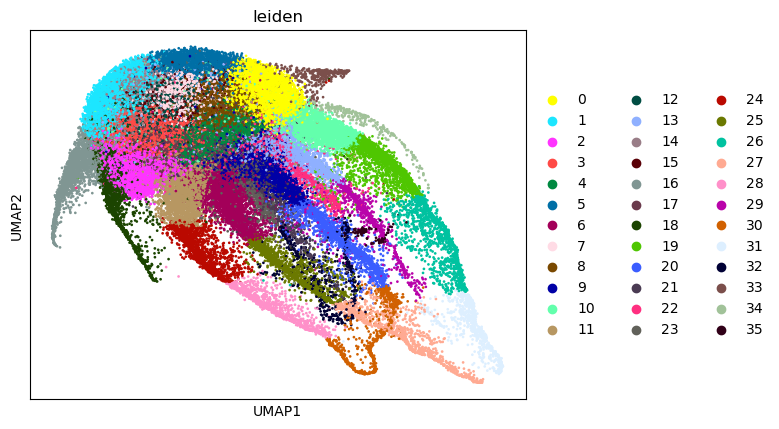

In [8]:
sc.pl.umap(adata, color="leiden", size=15)

In [9]:
leiden16_guides = adata[adata.obs.leiden == "16"].obs.Metadata_Guide.tolist()
adata.obs["leiden16"] = ["leiden16" if guide in leiden16_guides else np.nan for guide in adata.obs.Metadata_Guide]

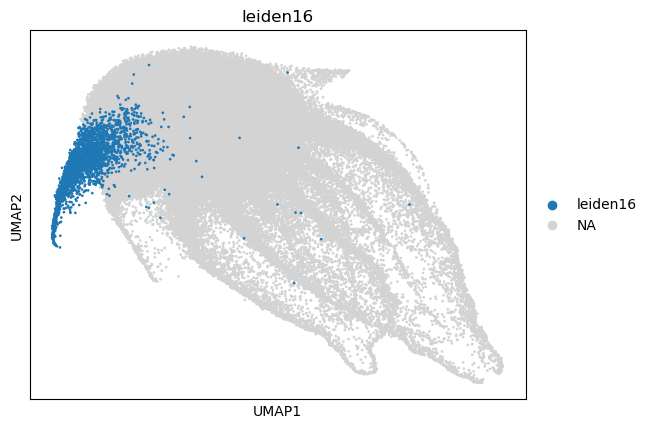

In [10]:
sc.pl.umap(adata, color="leiden16", size=15)

In [16]:
pd.DataFrame(leiden16_guides, columns=["Metadata_Guide"]).to_csv(_RESULTS_DIR / "leiden16_guides.csv", index=False)

## Localise guides in all other AnnDatas

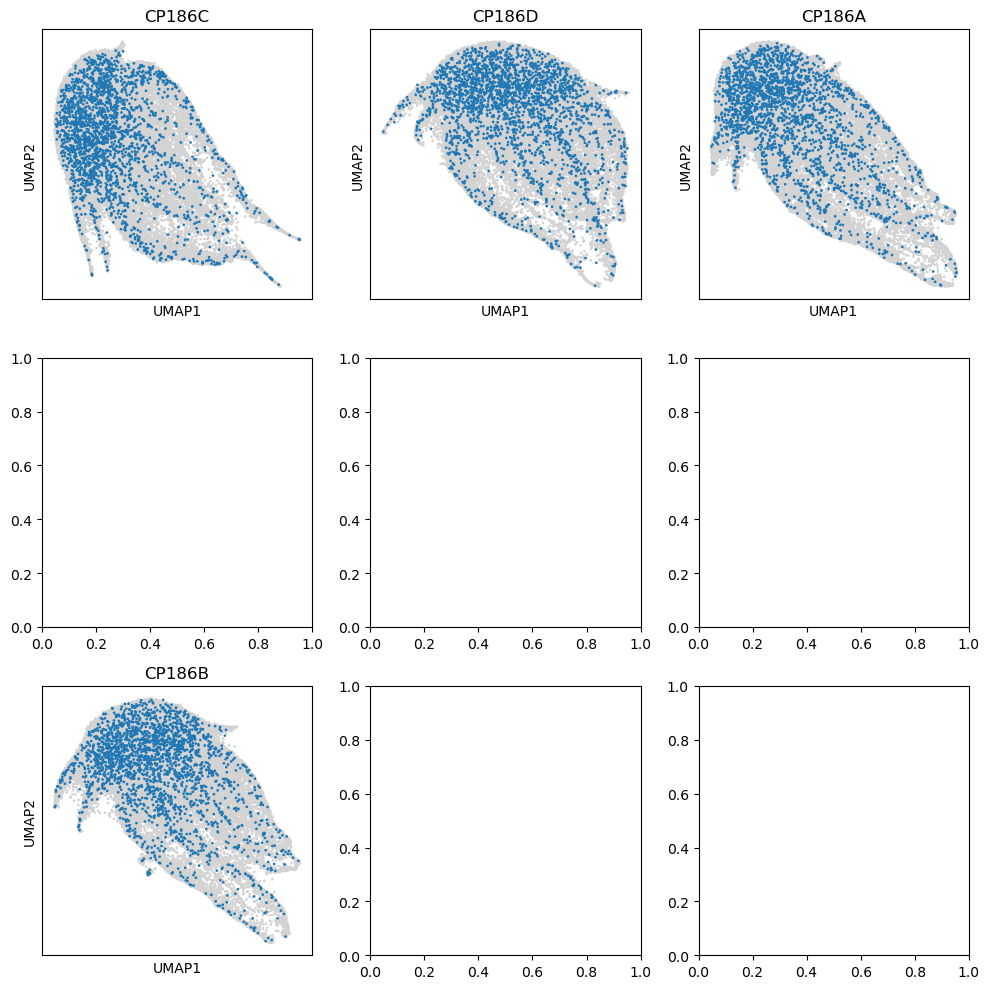

In [29]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 10))
axs = axs.flatten()

adata_dict = {}

for i, path in enumerate(_PLATE_DATA_PATH.rglob("*.csv.gz")):

    plate_id =_get_plate_id_from_path(path)
    
    if plate_id not in ["CP186A", "CP186B", "CP186C", "CP186D"]:
            continue
    
    adata = sc.read_h5ad(path.parent / f"{plate_id}_filtered.h5ad")
    
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    
    leiden16_guides = pd.read_csv(_RESULTS_DIR / "leiden16_guides.csv").Metadata_Guide.tolist()
    adata.obs["leiden16"] = ["leiden16" if guide in leiden16_guides else np.nan for guide in adata.obs.Metadata_Guide]
    
    sc.pl.umap(adata, color="leiden16", size=15, ax=axs[i], show=False, legend_loc=None, title=plate_id)
    
    adata_dict[plate_id] = adata

fig.tight_layout()

## Correlate tendril-values

### Generate leiden clusters we can then match

In [30]:
for plate_id in sorted(adata_dict.keys()):
    
    sc.tl.leiden(adata_dict[plate_id], resolution=2)

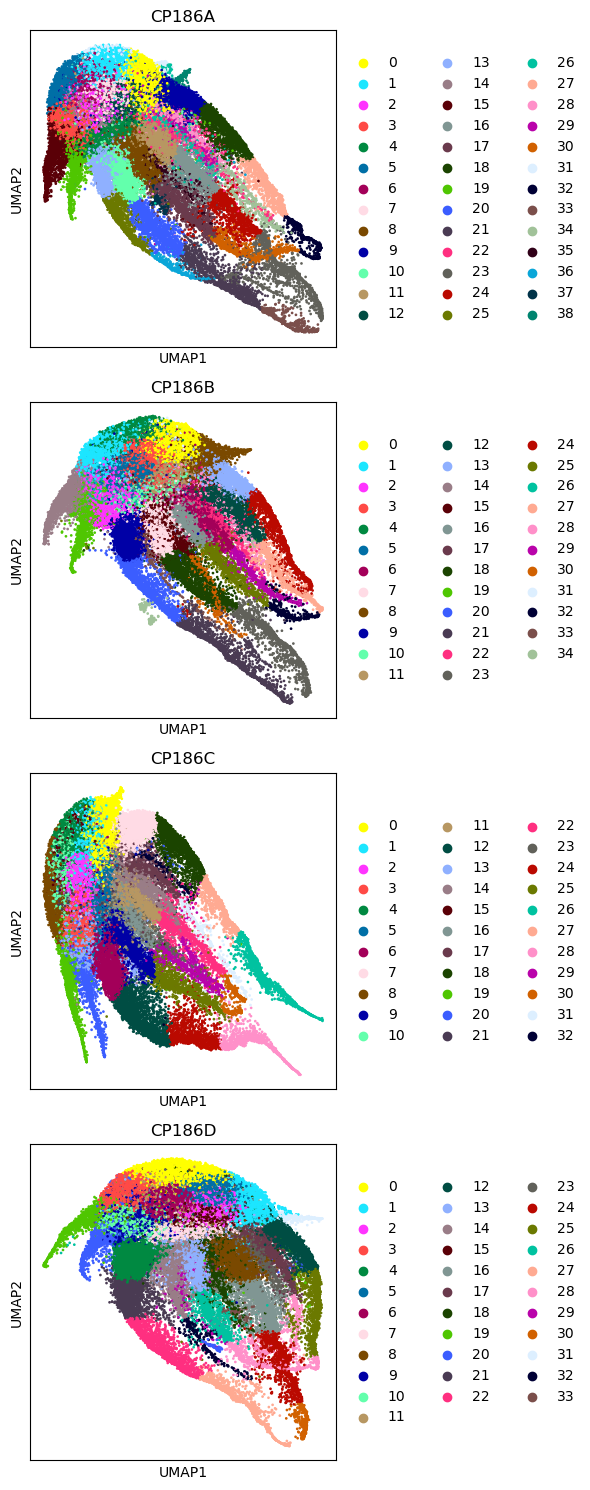

In [31]:
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(6, 15))

for i, plate_id in enumerate(sorted(adata_dict.keys())):
    
    sc.pl.umap(adata_dict[plate_id], color="leiden", size=15, ax=axs[i], show=False, title=plate_id)

fig.tight_layout()

# tendril 1: 15, 14, 19, 19

In [ ]:
tendril1_clusters = {
    "CP186A": "15",
    "CP186B": "14",
    "CP186C": "19",
    "CP186D": "19",
}

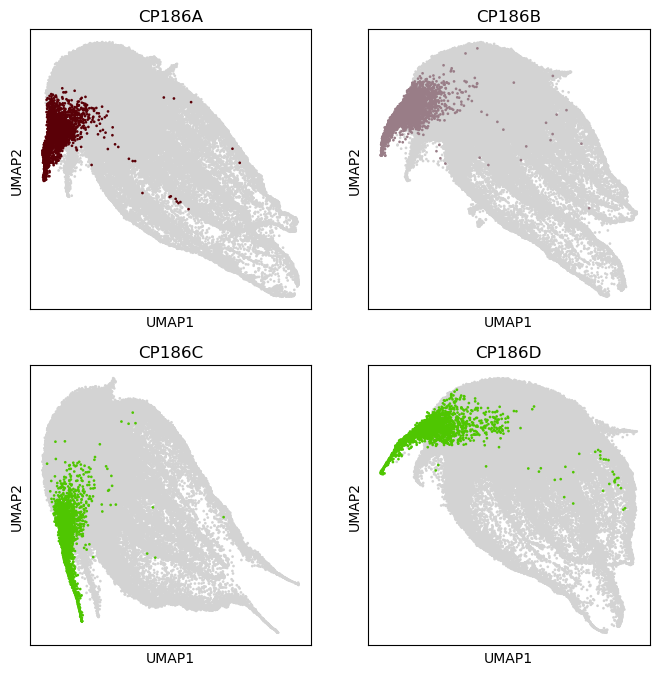

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 8))
axs = axs.flatten()

for i, plate_id in enumerate(sorted(adata_dict.keys())):
    
    sc.pl.umap(adata_dict[plate_id], color="leiden", groups=[tendril1_clusters[plate_id]], size=15, ax=axs[i], show=False, legend_loc=None, title=plate_id)
    
    

### Extract intersection and correlate

1107 features shared between all tendrils.


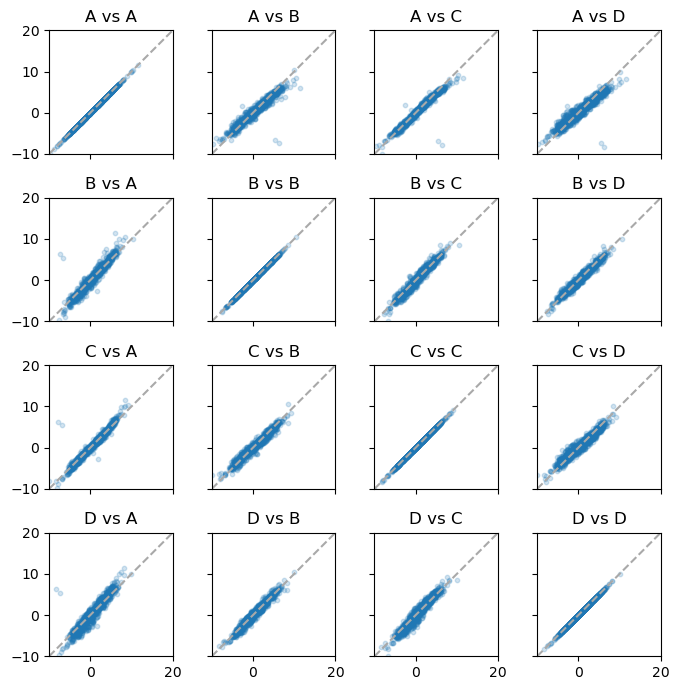

In [100]:
tendril1_features = {}

for i, plate_id in enumerate(sorted(adata_dict.keys())):
    
    tendril_adata = adata_dict[plate_id][adata_dict[plate_id].obs.leiden == tendril1_clusters[plate_id]]
    tendril1_features[plate_id] = tendril_adata.to_df().columns.tolist()

common_features = tendril1_features["CP186A"]
for i, plate_id in enumerate(sorted(adata_dict.keys())):
    
    common_features = set(common_features).intersection(set(tendril1_features[plate_id]))

common_features = sorted(list(common_features))    
print(f"{len(common_features)} features shared between all tendrils.")

median_profiles = {}
for i, plate_id in enumerate(sorted(adata_dict.keys())):
    
    tendril_adata = adata_dict[plate_id][adata_dict[plate_id].obs.leiden == tendril1_clusters[plate_id]]
    median_profiles[plate_id] = tendril_adata.to_df()[common_features].median()

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(7, 7), sharex=True, sharey=True)

for i, plate_id_a in enumerate(sorted(adata_dict.keys())):
    for j, plate_id_b in enumerate(sorted(adata_dict.keys())):

        axs[i, j].set_xlim(-10, 20)
        axs[i, j].set_ylim(-10, 20)
        axs[i, j].set_aspect("equal")
        axs[i, j].axline((-10, -10), slope=1, color="#a9a9a9", linestyle="--")

        axs[i, j].scatter(
            x=median_profiles[plate_id_a],
            y=median_profiles[plate_id_b],
            alpha=0.2,
            s=10,
        )
        title = f"{plate_id_a.replace("CP186", "")} vs {plate_id_b.replace("CP186", "")}"
        axs[i, j].set_title(title)
    
fig.tight_layout()

Text(0.5, 1.0, 'CP186A-15 vs CP186B-8')

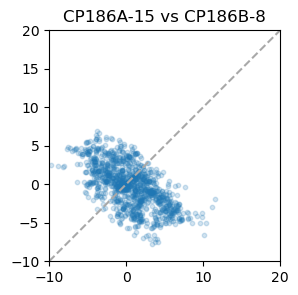

In [99]:
fig, ax = plt.subplots(figsize=(3, 3))

CP186A_adata = adata_dict["CP186A"][adata_dict["CP186A"].obs.leiden == "15"]
CP186B_adata = adata_dict["CP186B"][adata_dict["CP186B"].obs.leiden == "8"]

common_features = list(sorted(set(CP186A_adata.to_df().columns).intersection(set(CP186B_adata.to_df().columns))))

CP186A_profiles = CP186A_adata.to_df()[common_features].median()
CP186B_profiles = CP186B_adata.to_df()[common_features].median()

ax.set_xlim(-10, 20)
ax.set_ylim(-10, 20)
ax.set_aspect("equal")
ax.axline((-10, -10), slope=1, color="#a9a9a9", linestyle="--")

ax.scatter(
    
    x=CP186A_profiles,
    y=CP186B_profiles,
    alpha=0.2,
    s=10,
)
ax.set_title("CP186A-15 vs CP186B-8")

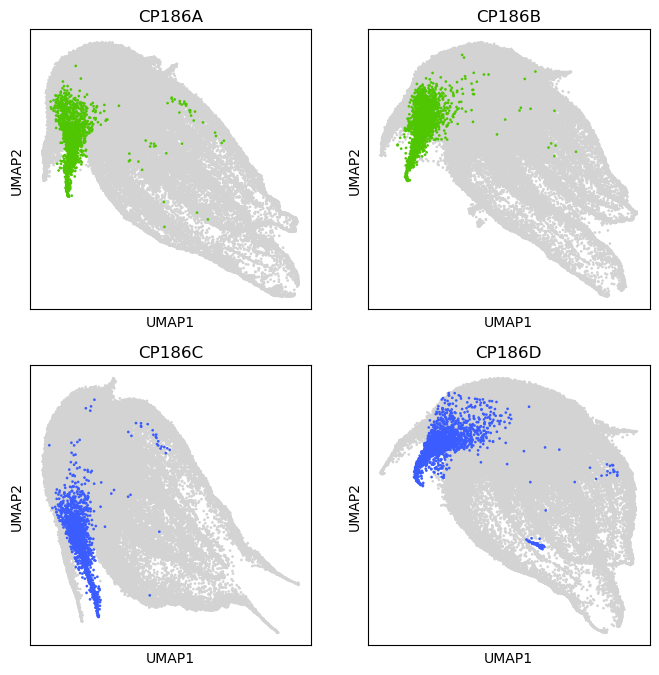

In [101]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 8))
axs = axs.flatten()

tendril2_clusters = {
    "CP186A": "19",
    "CP186B": "19",
    "CP186C": "20",
    "CP186D": "20",
}

for i, plate_id in enumerate(sorted(adata_dict.keys())):
    
    sc.pl.umap(adata_dict[plate_id], color="leiden", groups=[tendril2_clusters[plate_id]], size=15, ax=axs[i], show=False, legend_loc=None, title=plate_id)
    
    

1107 features shared between all tendrils.


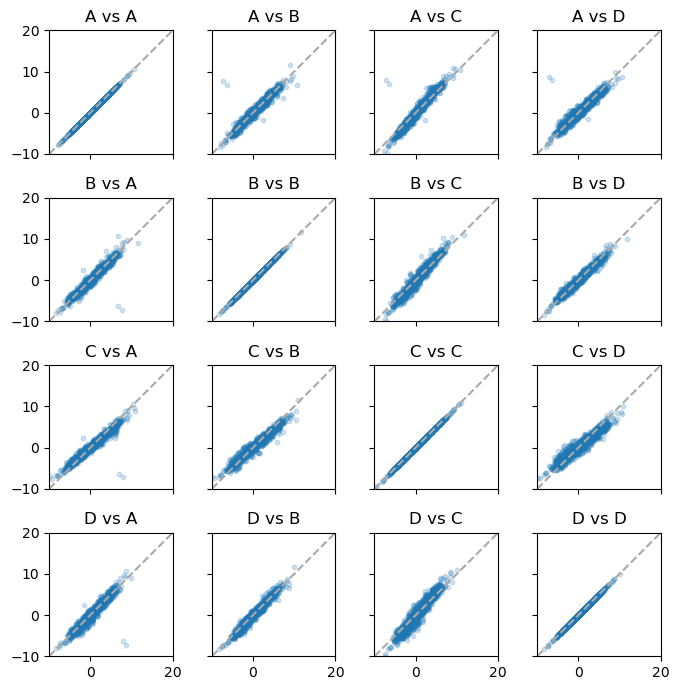

In [102]:
tendril2_features = {}

for i, plate_id in enumerate(sorted(adata_dict.keys())):
    
    tendril_adata = adata_dict[plate_id][adata_dict[plate_id].obs.leiden == tendril2_clusters[plate_id]]
    tendril2_features[plate_id] = tendril_adata.to_df().columns.tolist()

common_features = tendril2_features["CP186A"]
for i, plate_id in enumerate(sorted(adata_dict.keys())):
    
    common_features = set(common_features).intersection(set(tendril2_features[plate_id]))

common_features = sorted(list(common_features))    
print(f"{len(common_features)} features shared between all tendrils.")

median_profiles = {}
for i, plate_id in enumerate(sorted(adata_dict.keys())):
    
    tendril_adata = adata_dict[plate_id][adata_dict[plate_id].obs.leiden == tendril2_clusters[plate_id]]
    median_profiles[plate_id] = tendril_adata.to_df()[common_features].median()

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(7, 7), sharex=True, sharey=True)

for i, plate_id_a in enumerate(sorted(adata_dict.keys())):
    for j, plate_id_b in enumerate(sorted(adata_dict.keys())):

        axs[i, j].set_xlim(-10, 20)
        axs[i, j].set_ylim(-10, 20)
        axs[i, j].set_aspect("equal")
        axs[i, j].axline((-10, -10), slope=1, color="#a9a9a9", linestyle="--")

        axs[i, j].scatter(
            x=median_profiles[plate_id_a],
            y=median_profiles[plate_id_b],
            alpha=0.2,
            s=10,
        )
        title = f"{plate_id_a.replace("CP186", "")} vs {plate_id_b.replace("CP186", "")}"
        axs[i, j].set_title(title)
    
fig.tight_layout()

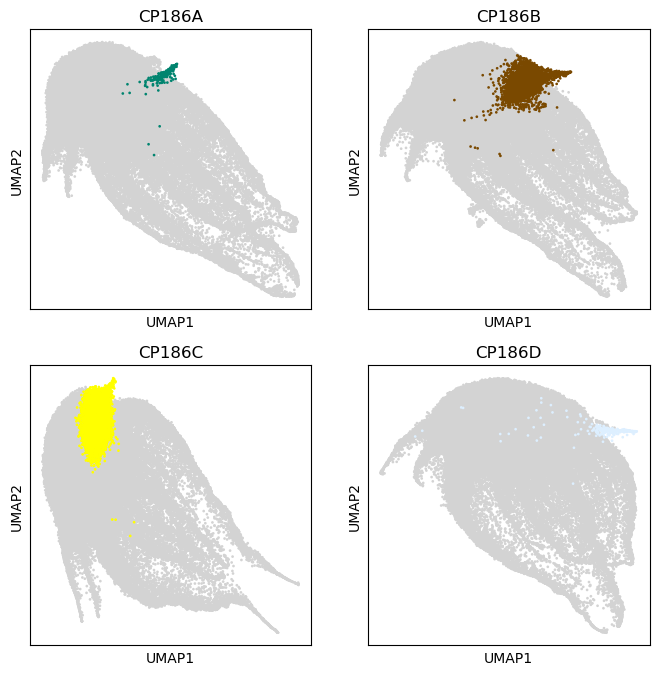

In [35]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 8))
axs = axs.flatten()

tendril3_clusters = {
    "CP186A": "38",
    "CP186B": "8",
    "CP186C": "0",
    "CP186D": "31",
}

for i, plate_id in enumerate(sorted(adata_dict.keys())):
    
    sc.pl.umap(adata_dict[plate_id], color="leiden", groups=[tendril3_clusters[plate_id]], size=15, ax=axs[i], show=False, legend_loc=None, title=plate_id)
    
    

1107 features shared between all tendrils.


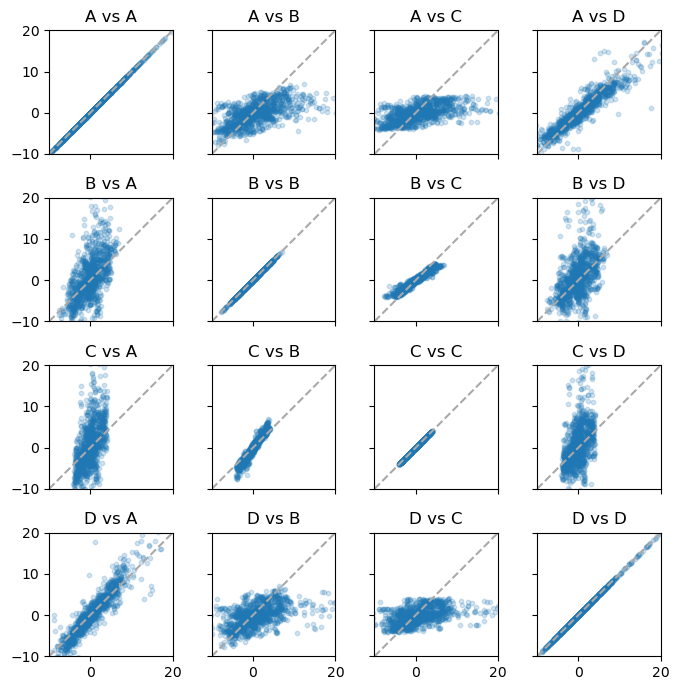

In [103]:
tendril3_features = {}

for i, plate_id in enumerate(sorted(adata_dict.keys())):
    
    tendril_adata = adata_dict[plate_id][adata_dict[plate_id].obs.leiden == tendril3_clusters[plate_id]]
    tendril3_features[plate_id] = tendril_adata.to_df().columns.tolist()

common_features = tendril3_features["CP186A"]
for i, plate_id in enumerate(sorted(adata_dict.keys())):
    
    common_features = set(common_features).intersection(set(tendril3_features[plate_id]))

common_features = sorted(list(common_features))    
print(f"{len(common_features)} features shared between all tendrils.")

median_profiles = {}
for i, plate_id in enumerate(sorted(adata_dict.keys())):
    
    tendril_adata = adata_dict[plate_id][adata_dict[plate_id].obs.leiden == tendril3_clusters[plate_id]]
    median_profiles[plate_id] = tendril_adata.to_df()[common_features].median()

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(7, 7), sharex=True, sharey=True)

for i, plate_id_a in enumerate(sorted(adata_dict.keys())):
    for j, plate_id_b in enumerate(sorted(adata_dict.keys())):

        axs[i, j].set_xlim(-10, 20)
        axs[i, j].set_ylim(-10, 20)
        axs[i, j].set_aspect("equal")
        axs[i, j].axline((-10, -10), slope=1, color="#a9a9a9", linestyle="--")

        axs[i, j].scatter(
            x=median_profiles[plate_id_a],
            y=median_profiles[plate_id_b],
            alpha=0.2,
            s=10,
        )
        title = f"{plate_id_a.replace("CP186", "")} vs {plate_id_b.replace("CP186", "")}"
        axs[i, j].set_title(title)
    
fig.tight_layout()

In [105]:
pd.read_csv("/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/20200805_A549_WG_Screen_guide_ALLBATCHES___CP186N___ALLWELLS.csv.gz")

,Metadata_Foci_Barcode_MatchedTo_GeneCode,Metadata_Foci_Barcode_MatchedTo_Barcode,Cells_AreaShape_Area,Cells_AreaShape_BoundingBoxArea,Cells_AreaShape_BoundingBoxMaximum_X,Cells_AreaShape_BoundingBoxMaximum_Y,Cells_AreaShape_BoundingBoxMinimum_X,Cells_AreaShape_BoundingBoxMinimum_Y,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,...,Nuclei_Texture_Variance_WGA_10_02_256,Nuclei_Texture_Variance_WGA_10_03_256,Nuclei_Texture_Variance_WGA_20_00_256,Nuclei_Texture_Variance_WGA_20_01_256,Nuclei_Texture_Variance_WGA_20_02_256,Nuclei_Texture_Variance_WGA_20_03_256,Nuclei_Texture_Variance_WGA_5_00_256,Nuclei_Texture_Variance_WGA_5_01_256,Nuclei_Texture_Variance_WGA_5_02_256,Nuclei_Texture_Variance_WGA_5_03_256
0,A1BG,CAAGAGAAAGACCACGAGCA,2603.0,4851.0,1468.0,2894.0,1419.0,2795.0,1443.4,2837.30,...,1.26310,2.9973,0.0,0.0,0.0,0.0,1.51190,1.43630,1.33820,1.68050
1,A1BG,CATCTTCTTTCACCTGAACG,4101.0,6580.0,3755.0,598.0,3641.0,535.0,3693.6,564.21,...,3.78500,4.8541,0.0,0.0,0.0,0.0,3.85120,3.93380,3.77430,3.72590
2,A1BG,CTCCGGGGAGAACTCCGGCG,3239.5,5497.0,2103.0,1007.0,2029.0,921.0,2065.1,958.91,...,2.50170,2.3756,0.0,0.0,0.0,0.0,1.61920,1.68540,1.65100,1.84810
3,A1BG,TGGAAGTCCACTCCACTCAG,687.0,1056.0,2194.0,2828.0,2170.0,2784.0,2179.6,2803.80,...,0.00000,0.0000,0.0,0.0,0.0,0.0,5.39490,9.21350,7.20150,6.66880
4,A1CF,AGTTATGTTAGGTATACCCG,1888.0,2880.0,3025.0,5403.0,2965.0,5355.0,2998.4,5377.00,...,0.74194,1.0871,0.0,0.0,0.0,0.0,0.57503,0.57509,0.58359,0.69591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74179,nontargeting,TTTATGCATTTAATACGCCG,2835.5,4941.0,2998.0,3286.5,2908.0,3192.0,2949.4,3247.60,...,2.58460,2.8485,0.0,0.0,0.0,0.0,2.54340,2.54100,2.41860,2.56210
74180,nontargeting,TTTCTAGTTACTACTGGACG,2717.5,5040.5,3076.0,2937.0,3021.5,2880.5,3047.9,2909.40,...,2.95980,3.1518,0.0,0.0,0.0,0.0,2.96330,3.13720,2.96030,3.15460
74181,nontargeting,TTTGGCAGTACCTTTTATTA,2815.5,4909.0,3101.5,2840.5,3047.5,2774.5,3071.6,2806.90,...,2.20100,2.5296,0.0,0.0,0.0,0.0,1.95870,2.07510,1.92760,2.15950
74182,nontargeting,TTTTACCTTGTTCACATGGA,2787.0,4950.0,2778.0,2822.0,2714.0,2757.0,2750.0,2790.00,...,3.05970,3.6941,0.0,0.0,0.0,0.0,3.04590,3.15600,2.95680,3.15320
